# Classification with Decision Trees

## Introduction
In the last lesson, we learned how to "Scrub" a dataset and prepare it for predictive analytics tasks such as classification or regression.  In this lab, we'll prepare a dataset and go one step further, using **_Decision Trees_** to classify whether or not candy is chocolate.  

## Objectives

* Complete a small data science project end-to-end using the OSEMN Data Science Process.  
* Use holdout validation to split our dataset into _training_ and _testing_ sets, including Cross Validation
* Demonstrate the relationship between Entropy and Information Gain, and use Entropy/GINI impurity to manually build a Decision Stump (Decision Tree with a single split)
* Train a Decision Tree Classifier model from `scikit-learn` on our _training_ set, and visualize the model for easy interpretation
* Use our trained model to make predictions on our _testing_ set, to evaluate how well our model will do on real-world data

## End-to-End Data Science

For this lab, we'll follow the steps of our now familiar Data Science Process, OSEMN.  Our goal is to build a Decision Tree that can look at the attributes of a piece of candy and accurately classify if the candy is chocolate or not. This is a **_binary classification_** problem--each prediction we need to make will either be yes (1) or no (0).

Let's outline the steps we'll need to take in this lab:

<center><h3>Obtain</h3></center>  
We'll begin by reading the dataset into a `pandas` dataframe and inspecting a sample to get a look at our data.  

<center><h3>Scrub</h3></center>  
We'll store our target feature (the `'chocolate'` column) in a separate variable, so that we can remove it from the dataset later.  We'll also double-check that our dataset is in a format that will work for modeling, checking the data type of each column, and making sure we have no null values.  

<center><h3>Explore</h3></center>   
We'll briefly explore the model by examining and visualizing our two main groups of candy--chocolate and non-chocolate candies. We should always--**_always_** get a feel for the data we are working with before we jump into modeling.

<center><h3>Modeling</h3></center>  
This step will take up the majority of this lab, by far.  We'll start by building small, simple decision trees with only one or two splits by hand, just to get a feel for the concept of entropy and for how Decision Trees work. Once we have a decent inuition for the logic behind Decision Trees, we'll dive into Sci-Kit Learn and use its `DecisionTreeClassifier` class.  As we work through the modeling step, we'll also follow best practices by splitting our data into `training` and `testing` sets, to make sure that our model isn't overfitting.  

<center><h3>iNterpret</h3></center>  
Finally, we'll examine our newly trained model to see how well it did.  One handy feature of Decision Trees is that they're extremely easy to visualize.  In this step, we'll visualize our model and see how it helps us interpret our results.  

<center><h3>Let's get started!</h3></center>

## Obtaining our data
For this lab, we'll be working with 538's [Ultimate Halloween Candy Power Rankings Dataset](https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking). This dataset contains data on 85 different types of candy.  The dataframe contains a comphrensive list of attributes we can use to compare the candies.  The data is currently stored in a .csv file.  We'll use `pandas` to read the data in to a data frame.  

For convenience's sake, we've reproduced the **_Data Dictionary_** from the link above.  Data Dictionaries are used to tell us exactly what everything means in a dataset, so that we can correctly interpret the data when we look at it.


<center><h3>Data Dictionary</h3></center>

| Feature          | Definition                                                   | Data Type               |
|------------------|--------------------------------------------------------------|-------------------------|
| chocolate        | Does it contain chocolate?                                   | Boolean (0=False, 1=True)                |
| fruity           | Is it fruit flavored?                                        | Boolean (0=False, 1=True)                |
| caramel          | Is there caramel in the candy?                               | Boolean (0=False, 1=True)                |
| peanutalmondy    | Does it contain peanuts, peanut butter or almonds?           | Boolean (0=False, 1=True)                |
| nougat           | Does it contain nougat?                                      | Boolean (0=False, 1=True)               |
| crispedricewafer | Does it contain crisped rice, wafers, or a cookie component? | Boolean (0=False, 1=True)                |
| hard             | Is it a hard candy?                                          | Boolean (0=False, 1=True)               |
| bar              | Is it a candy bar?                                           | Boolean (0=False, 1=True)                |
| pluribus         | Is it one of many candies in a bag or box?                   | Boolean (0=False, 1=True)                |
| sugarpercent     | The percentile of sugar it falls under within the data set.  | Float 0.0 - 1.0 (Percentage) |
| pricepercent     | The unit price percentile compared to the rest of the set.   | Float 0.0 - 1.0 (Percentage) |
| winpercent       | The overall win percentage according to the 269,000 matchups | Float 00.0 - 100.0 (Percentage) |

In the cell below, complete the following steps to import the dataset:

1) Import `pandas` and alias it as `pd`

2) Pass in `'candy-data.csv'` to `pd.read_csv()` to read the data into a dataframe.  Store the result in the `df` variable. 

3) Display the first few rows of the dataframe by using our dataframe object's `.head()` method.

In [1]:
# Step 1
import pandas as pd

# Step 2
df = pd.read_csv('candy-data.csv')

# Step 3
print("number of rows in dataset: {}".format(len(df)))
df.head()

number of rows in dataset: 85


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Scrubbing our data

Take a look at the example data displayed above.  What do you notice?

We're going to use this dataset to predict which candies are chocolate based on the features contained above.  Before we can do that, we need to do a couple things to prepare our dataset for exploration and modeling:

**_Store the labels in a separate variable_**. We need to store the `chocolate` column in a separate variable, so that we can remove it before our modeling step (we'll leave it in until we finish with the _Explore_ step to make things simpler).  The `chocolate` column will act as our **_labels_**, since the order they are in will still correspond to the order of the dataframe--for example, `target[0]` will still refer to the 100 grand bar, which is at index 0 in `df`.  

**_Remove columns that aren't useful_**.  There's one column in the dataset that isn't useful for making predictions about the chocolatey-ness of candies.  Can you figure out which one? If you guessed `competitorname`, you are correct--give yourself a piece of candy.  This data isn't useful each name is unique to it's given row, and we can't use them to make predictions about other rows.  An easy way to understand this is to ask yourself if you could make predictions if the name was the only column you had to work with.  The answer is no--knowing if _100 Grand_ is chocolate or not gives you no information about _Air Heads_, and vice versa.  In this case, our best bet is to drop the column from the dataframe all together.  

**_Make all percentages columns the same scale_**.  Take a look at the last three columns in the dataframe displayed above.  Notice what's wrong here?  Each column is meant to represent a percentage value between 0 and 100%, but the first two are scaled between 0 - 1, while the `winpercent` column is between 0 and 100.  This is the type of small mistake that is really easy to miss, but can cause us big problems down the road.  We'll avoid those problems by dividing the `winpercent` column by 100 to make it the same scale as `sugarpercent` and `pricepercent`.

**_Check for null values_**.  In order for our model to correctly learn from the data, we need to make sure there are no **_null_** values in the dataset.  In `pandas`, null values are represented as `NaN`.  No matter how big or small the dataset is, we always have to detect and deal with null values.  Even if we have a billion rows of data, if 1 cell contains a null value, that's enough to cause an error.  Luckily, `pandas` comes built in with some really handy tools that makes checking for null values a cinch.  

**_Double check the data type of each column_**.  This one may seem like a no-brainer, but it's an easy mistake to make.  When we look at the sample of the dataframe printed out above and see a number, there's no immediate way to tell if it's encoded as a string, integer, or float.  Before we move on to the next step, we'll want to write a few lines of code to double check that everything is, in fact, encoded as floats or ints, and not strings.  

For this stage of the process, we'll need to complete the following steps:

1) Store the `chocolate` column in the `target` variable.  Recall that in `pandas`, we can use the python list slicing syntax, but we pass in the column name instead of an index value.  (e.g. `df['caramel']` would retreive the 'caramel' column from the `df` object).  

2) call `pd.drop()`, and pass in the string `'competitorname'` as the value.  Also pass in the keyword parameters `axis=1` to tell the function that the item we passed in corresponds to a column, not a row.  We'll store the result that is returned in `df`.

3) Set the dataframe's `winpercent` column to `winpercent` divided by 100.0. 

4) To check for null values in each column, call `df.isna().any()`. 

5) Check the `df` object's `.dtype` attribute to see what data type each column is encoded as.  

In [2]:
# Step 1
target = df['chocolate']

# Step 2
df = df.drop('competitorname', axis=1)

# Step 3
df['winpercent'] = df['winpercent'] / 100
display(df.head())
# Step 5
print("Check if columns contain NaNs:")
print(df.isna().any())

# Step 5
print("Data type of each column:")
print(df.dtypes)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,0.669717
1,1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029
2,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611
3,0,0,0,0,0,0,0,0,0,0.011,0.511,0.461165
4,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415


Check if columns contain NaNs:
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool
Data type of each column:
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object


## Exploring the dataset

During the Explore step, we want to get a feel for our data, and see if we can spot anything that might help us during the modeling step.  Luckily, our goal is pretty clear here, and the features in our dataset our self-explanatory.  This makes this step pretty easy for us.  

For this stage of the process, we'll need to complete the following steps:

1. Use our dataframe's `.groupby()` method to get the total number of instances for each feature for candy's that are and aren't chocolate.  (Hint: Once you've called `.groupby()` on the `chocolate` column, chain it with the `.sum()` method).  If you're unsure of how to do this, see the syntax hint below.

```python
# If we wanted to see the sum of features for caramel/non-caramel groupings:
grouped_by_caramel = df.groupby('caramel').sum()
```
<br>
1. Visualize the results in a histogram using the dataframe's `.plot().bar()` method. 

In [3]:
grouped_by_chocolate = df.groupby('chocolate').sum()
grouped_by_chocolate

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,37,4,2,1,0,14,1,32,21.741,16.465,20.228283
1,1,10,12,6,7,1,20,12,18.944,23.390,22.540966


In [4]:
grouped_by_chocolate.plot.bar()

There's something not quite right about that graph. Take a minute to examine the graph and the dataframe above and see if you can figure out what's wrong...


### Dealing with Different Data Types
If you noticed the percentage columns, you're right! Using the `.sum()` function as an aggregator to group by makes sense for any of the boolean columns that contain only `0` or `1`, since interpreting this is intiutive.  For instance, we can look at the `grouped_by_chocolate` dataframe and notice that 37 different non-chocolate candies are fruit-flavored.  However, this strategy breaks down for the last three columns in the dataframe--`sugarpercent`, `pricepercent`, and `winpercent`.  Although the sum of these percentages still gives us a little bit of insight (e.g. chocolate candies won more head-to-head matchups overall than non-chocolate), these massive numbers don't tell us as much as averages would--they also break our visualization!

We'll fix this problem by doing two things:

1.  Dropping `sugarpercent`, `pricepercent`, and `winpercent` columns from our `grouped_by_chocolate` dataframe, and running the bar chart visualization again. Recall that you can drop columns from a dataframe by a list of column names to the dataframe's `.drop()` method.  Also pass the parameters `axis=1` and `inplace=False`.  Store the dataframe object returned in the `bools_only_df` variable.  Then, visualize `bools_only_df` as a bar chart. 

1.  Create a grouped dataframe called `avg_percentages` that consists of just the average percentages for our 3 percentage columns (`sugarpercent`, `pricepercent`, and `winpercent`) for both chocolate and non-chocolate candies.  We'll display this dataframe, as well as a visualization for each. (This will take three steps--see the syntax hint below!)

```Python
# Step 1: Put all the columns we want in our new dataframe in a list
cols = ['chocolate', 'sugarpercent', 'pricepercent', 'winpercent']
# Step 2: Slice the 'df' dataframe and pass the cols list as our index
percent_df = df[cols]
# Step 3: Use .groupby() on the 'chocolate' column as you did above, and chain it with a .mean() method--see if you can figure this one out for yourself!
```

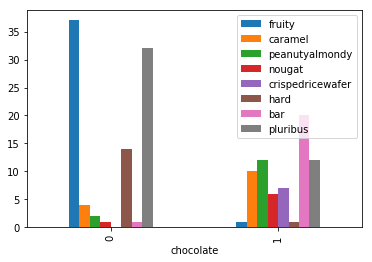

In [5]:
# Step 1.1: Drop ['sugarpercent', 'pricepercent', 'winpercent'] from grouped_by_chocolate.
bools_only_df = grouped_by_chocolate.drop(['sugarpercent', 'pricepercent', 'winpercent'], axis=1, inplace=False)

# Step 1.2: Visualize bools_only_df as a bar chart by calling '.plot.bar()' on it. 
bools_only_df.plot.bar()

,sugarpercent,pricepercent,winpercent
chocolate,,,
0,0.452937,0.343021,0.421423
1,0.512000,0.632162,0.609215


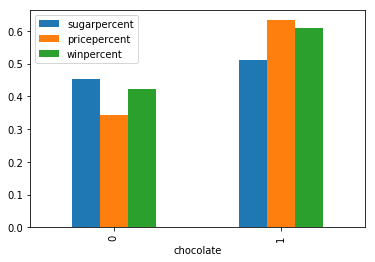

In [6]:
# Step 2.1: Store the names of the columns we want in this dataframe in a list
cols = ['chocolate', 'sugarpercent', 'pricepercent', 'winpercent']

# Step 2.2: Slice the df object.  Pass the cols variable as the index for the slicing operation.
percent_df = df[cols]

# Step 2.3 Group by the chocolate column as we did above.  This time, chain it with a '.mean()' 
# call instead of '.sum().
avg_percentages = percent_df.groupby('chocolate').mean()
display(avg_percentages)

# Step 2.4: Plot avg_percentages as a bar chart, as we did above.
avg_percentages.plot.bar()

Not bad for some quick Exploratory Data Analysis!  The great thing about visualizing during the _Explore_ step is that important information becomes obvious.  For instance, take a look at the _fruity_ columns in our bar chart above.  It seems like an overwhelming amount of the time when a candy is fruity, it's also not chocolate.  This is the type of information that we can use to help build our classifier during the next step!

Based on our explorations above, can you find two more things make it easy to tell the difference between chocolate and non-chocolate candies?  Double-click on this text cell and write them down below--we're going to use them in the next section!

**_Answer 1:_**  Fruity candies are almost always non-chocolate.  

**_Answer 2:_**

**_Answer 3:_**

## Building our Model

For this step, we'll use one of the most powerful tools in analytics--a **_Decision Tree_**.  Decision Trees are a type of predictive model that can be used for classification or regression.  Better yet, they are simple to interpret, and intuitively easy to understand how they work.  To get a feel for how Decision Trees work, we're going to build simple version of one on our own, before moving on to professional tools such as the **_scikit-learn_** library (called _sklearn_ for short).  

#### Growing our own Decision Tree

Let's do a thought experiment real quick. If we could only look at one feature before classifying each candy as chocolate or non-chocolate, and we our goal is to build the most accurate model possible--which feature would you look at?  Take a minute to think about this (Hint: review our findings during the _Explore_ step!)

<center><img src='thinking.gif'></center>
    
Based on our Exploratory Data Analysis, we would get the best results from splitting on the `fruity` column!  It's accuracy won't be great, but mathematically, it would do better than any other single split we could make.  This sort of split is perfect for a basic `if/else` block in python.  Let's think about how this would look in Python.  

```python
def predict(row):
    if row['fruity'] == 1:
        return 0
    else:
        return 1
```

That's some pretty basic python code, but it's also something else--the most basic Decision Tree we can build--a **_Stump_**! (No, seriously.  Decision Trees with only one split are called a Stump).  

We'll use this logic examine every piece of candy in the data set. Anytime we see that a candy is fruity, we'll immediately predict a `0`, and a `1` anytime that is isn't fruity.  This is pretty easy to code up--we just need to loop through the `fruity` column, and make a prediction for each item.  We'll store all our predictions in a list called `predictions`.

To build our own little Decision Tree that could, complete the following steps:

1. Slice the `fruity` column from the `df` dataframe.  Store it in the `fruity_data` variable.  
<br>
2. Complete the `make_predictions` function. This function will take in the `fruity_data` list, and loop through it.  Every time it sees a `1`, it should append a `0` to a list variable inside the function called `predictions`.  Every time it sees a `0` inside `fruity_data`, it should append a `1` to predictions.  After the loop is finished, return the `predictions` list.    
<br>
3. Call the `make_predictions` function and pass in the `fruity_data` variable.  Store the results in a variable called `predictions`.

In [7]:
# Step 1: Get the fruity column from the `df` object.
fruity_data = df['fruity']

# Step 2: Complete the function.
def make_predictions(fruity_data):
    predictions = []
    for i in fruity_data:
        if i == 1:
            predictions.append(0)
        else:
            predictions.append(1)
    return predictions

# Step 3: Call function and store output in predictions variable
predictions = make_predictions(fruity_data)

Great! Now that we have predictions from our Decision Stump (take a second to groan at the name, if you must), let's write a function to see how well it did.  In order to measure the model's performance, we'll use the **_Accuracy_**  metric.  

In order to understand accuracy, we need to think about the 4 potential cases can happen when we compare our predictions with the actual grouund truth (the labels that tell us if a candy actually is or isn't chocolate). 

These are: 

**_True Positive_**: We predicted it was chocolate, and it was. 

**_True Negative_**: We predicted it wasn't chocolate, and it wasn't.

**_False Positive_**: We predicted that it was chocolate, but it wasn't.

**_False Negative_**: We predicted that it wasn't chocolate, but it was.  

Often, data scientists will place all of these in a table called a **_Confusion Matrix_**.  Take a look at this handy example pulled from [mlxtend](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/):

<center><img src='confusion_matrix.png'></center>

We can use a confusion matrix to compute our **_accuracy_**.  Accuracy is defined as:  
<br>  
<center>
$$
\normalsize 
\frac{True\ Positives + True\ Negatives}{True\ Positives + True\ Negatives + False\ Positives + False\ Negatives}
$$  
</center>

This is just a fancy way of saying we divide the number of predictions we got correct by the total number of predictions.  

Next, we'll:

1. Write a function called `accuracy` that takes in two parameters--`predictions` and `labels`.  This function should contain a variable that called `num_correct`, which should initially be set to `0`.  It should iterate through the lists, comparing each value in `predictions` with the value at the corresponding index in `labels`.  When they are equal, increment `num_correct` by 1.  Otherwise, do nothing.  Once the loop has finished, divide `num_correct` by the total number of items in the dataset and return that value.  This is our accuracy score.  

2. Call the accuracy function by passing in our `predictions` variable and our `target` variable (we created this in the beginning of the lab).  Store the results in a variable called `stump_accuracy.` Run the cell to see the accuracy for our stump. 

In [8]:
def accuracy(predictions, labels):
    num_correct = 0
    for i in range(len(predictions) - 1):
        if predictions[i] == labels[i]:
            num_correct += 1
    
    return num_correct / len(predictions)

stump_accuracy = accuracy(predictions, target)
print("Accuracy Score for Fruity Decision Stump: {}".format(stump_accuracy))

Accuracy Score for Fruity Decision Stump: 0.8470588235294118


<center>**_Whoa--84.7%!_** Not bad for a Stump. 

<img src='treestump.jpg' height=60% width=60%>
_The wise and mighty Decision Stump in its natural habitat, 2018._

<br>
<br>
If we were to visualize what our stump looked like as a Decision Tree, it would look like this: 

<img src='stump_viz.png' height=40% width=40%></center>

Usually, one split isn't enough to do so well.  What if, instead of immediately labeling each sub-group after the first split as chocolate/non-chocolate, we repeated our splitting process, searching each sub-group for a split that would more accurately help us split up chocolate/non-chocolate candies?  This is exactly how Decision Trees work!


### How Decision Trees Work

This brings us to the main idea behind Decision Trees.  With every split, a Decision Tree tries to maximize the the amount of **_information gain_** with each split.  Think about why we picked `fruity` as the best choice for our split.  By splitting based on the value of this column, we split our dataset into two groups with the most chocolates on one side and non-chocolates on the other.  Conversely, if we chose to split on a column where both sub-groups were equally composed of chocolate and non-chocolate candies, we would have gained no information at all--our model after the split is no better at separating the two types after the split than before it.  

When things are messy and the targets are mixed up, we say that it has high **_entropy_** (you may have noticed the visualization above uses _gini_ instead of entropy--for our purposes, we can treat them as essentially the same thing).  Entropy is a measure of disorder.  A sample where every item is the same has zero entropy, whereas a sample that has an equal number of 2 (or more) classes in it has maximum entropy. 

In a professional-quality Decision Tree algorithm, such as the one we'll use from the _sklearn_ library, the algorithm examines every possible rule it could use to make a split, and picks the one that will decrease entropy the most.  It continues this until it has accurately classified everything (unlikely), or until it has reached a predetermined threshold such as the number of splits.  


### Using Professional Modeling Tools to Build a Decision Tree

This brings us to the most fun part of the lab--building models using the Data Science community's favorite Machine Learning library, _sklearn_! The remaining parts of this stage will focus on creating our model using _sklearn_, and on validating our model with a **_testing set_** to double check that the Decision Tree that is built generalizes well to real-world data, and didn't just memorize the data in the training set we gave it (more on this later).

Importing the things we need from sklearn is fairly straight-forward.  However, you're still encouraged to check out [sklearn's documentation for Decision Tree Classifiers!](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

We'll start by running the cell below to import what we need.  

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

That was easy.  Next, we'll create a version of the dataset that has the `chocolate` column removed.  This is the reason we stored the labels in our `chocolate` column in a variable called `target` at the beginning of the lab.  If we don't remove that column from the dataset before feeding the data to our Decision Tree Classifier, it will just treat that as another column.  It's a bit like having it take a test on the answer key--it won't actually learn anything, because the answers are already provided.  

1.  Drop the `chocolate` column from the df object.  Also pass the parameters `axis=1` and `inplace=False`.  Store the dataframe that is returned in the `labels_dropped_df` variable.  

In [10]:
labels_dropped_df = df.drop('chocolate', axis=1, inplace=False)

Great.  Now we have a dataset that contains everything but our labels, and a variable containing just our labels. Next, we'll randomly grab a sample of data (and their corresponding labels) to hold out as our **_test set_**.  Before we do this, let's quickly examine why this is a good idea.

### Holdout Validation Methods, and Detecting Overfitting/Underfitting

A cardinal rule of the Modeling step is that any models we learn should be **_generalizable_** to the real-world.  If they only apply to data in datasets they've already seen, then they aren't very useful.  Our goal is to build a model (in this case, a Decision Tree Classifier) that can look at the data make accurate predictions about the chocolatey-ness of other candies not in this dataaset.  However, our Decision Tree is built in such a way that its goal is to maximize performance on **_training data_** it's given.  Sometimes, we may think our models are getting high accuracy because they have successfully learned some great things that help it make predictions about candy, but in reality, the model has just memorized some of the specifics.  This means that whatever it learns won't apply to the real world, because it hasn't memorized the data it will see in the real world, only the data in the training set.  We call this **_Overfitting_**.  

This is more intuitive when we think about how we learn, too.  Let's say you have a big test in Biology coming up soon, so you and your best friend buy a study guides with practice questions in them.  You study the material in the study guide, and try to learn everything you can about Biology for this test.  When you take the practice exam, you score a respectable 88%. 

Your friend, however, takes a different route.  Instead, they memorize every question in the study guide, and the corresponding answer to it.  When they take the practice test, they get a 100%.  

**_Who is going to do better on the actual biology test? _**

You are, because you learned a model of biology that generalizes well to the real world.  Although your friend may have walked into the test with high confidence, they were doomed to failure from the moment they sat down--after all, the practice test isn't the test.  It's going to have different questions on it.  

The problem with modeling is when we give it the training data, all we ever see are the "scores from the practice test".  This may signal that the model learned what it needed to learn to do well on its given task in the real-world, but it may also have just memorized some of the data points to score higher (because getting a high score is it's goal). 

The easiest way to check how well our model will do in the real world is to cut off some of our training data and save it away for after the model is trained.  This data will become our **_testing set_**.  Since we have labels for it as well, we can ask the model to make predictions on the testing data, and then grade its performance to see how well it did.  This will be more similar to data seen in the real world, because we're asking the model to classify data it hasn't seen before.

### Picking the right amount of data

It's important that we pick enough data into our testing set so that we get a representative sample of our model's performance, but not so much that we take away too much training data and the model can't learn well.  

By default, _sklearn_'s `train_test_split` method randomly grabs 25% of the total data in the dataset and places it in the testing set.  However, we can dial this number up or down as you see fit--for a full explanation, take a look at the [train_test_split documentation.](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Run the cell below to randomly split our data and labels into training and testing sets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(labels_dropped_df, target, test_size=0.25)

As a convention, the datasets are always denoted with an `X` (capital because it's a 2-D matrix of data), and labels are always denoted with a `y` (lowercase because they are a 1-D array).  

In [12]:
# Step 1: Instantiate a DecisionTreeClassifier() object
clf = DecisionTreeClassifier()

# Step 2: Call the clf object's .fit() method.  Pass in X_train as the first parameter, and y_train as the second. 
clf.fit(X_train, y_train)

# Step 3: Use the clf object's .score() method to see how it does on the testing set.  Pass in X_test as the first 
# parameter, and y_test as the second. 
training_score = clf.score(X_train, y_train)
testing_score = clf.score(X_test, y_test)

print("Score on training set: {}".format(training_score))
print("Score on testing set: {}".format(testing_score))

Score on training set: 1.0
Score on testing set: 0.9545454545454546


**_90.9% on testing--that's great!_**

Note that if you run the two cells above again, the testing score will likely change. This is because of the random sampling that occurs when we re-run the cell containing `train_test_split()`.  Sometimes, the testing sample will randomly contain some of the harder examples, while sometimes, it will contain some of the easier samples.  This is the reason why we see the scores fluctuate.  When the score fluctuates, that doesn't necessarily mean the model that specific time is better or worse--it just means that the composition of the training and testing sets is different.  

If you really want to get a feel for how accurate the model is doing, we can run it multiple times and average all the scores together.  That's exactly where K-fold Cross Validation comes in. In K-fold cross validation, we choose \[K\] splits (5 is usually a good choice), and divide the data into \[K\] equal portions.  The first time we train a model, we use the first portion as our testing set, and combine every other potion to be our training set.  The second time, we use the second portion as our testing set, and combine every other portion to be our training set, and so on and so on, until every portion has had one instance where it is the testing set.  

Since each of those models will have different scores, we can take the average of all of them to get a better feel for how well our model actually does.   

(Note that when we use cross validation, we give it the full dataset and labels, instead of the output of `train_test_split()`, because cross-validation does it's own train-test splitting during the process!)

Run the cell below to use get the **_cross-validation score_** for our model.

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_score = cross_val_score(clf, labels_dropped_df, target, cv=5)
average_score = np.mean(cv_score)
print("Results from Cross-Validation: {}".format(cv_score))
print("Average score from Cross-Validation: {}".format(average_score))

Results from Cross-Validation: [ 0.77777778  1.          0.76470588  0.8125      0.8125    ]
Average score from Cross-Validation: 0.8334967320261437


Good thing we used cross-validation.  If we had only run it once and got a 72.2% or 94.4%, our understanding of our model's performance would be off in both cases by more than 10%! 

## Interpreting our Results

This brings us to the final stage of our Data Science Process--**_iNterpret_**.  During this stage, we would apply what we've learned from all of the stages so far to draw conclusions that can help us with our business goal.  This stage is often specific to the business use case, but there are some questions that we can ask that are fairly universal to this stage, regardless of the problem. 

The first and most pressing interpretation question we can ask is: is 81% accuracy good enough?

The answer depends on your goals.  In some cases, any accuracy slightly better than flipping a coin is exellent (e.g. what if a model could improve Amazon's revenue by even a fraction of a percent?).  In other cases, an accuracy as 99% still might not be good enough (think self-driving cars, or other modeling examples where human life is on the line if our model isn't good enough).  The answer to this question is up to you to interpret, depending on the question you/your team is trying to answer.  

Although we can't visualize every type of model, since we used a Decision Tree, we can in this case.  We'll end this session by visualizing our Decision Tree Classifier, so that we have a human-readable version that we can take to our boss.  

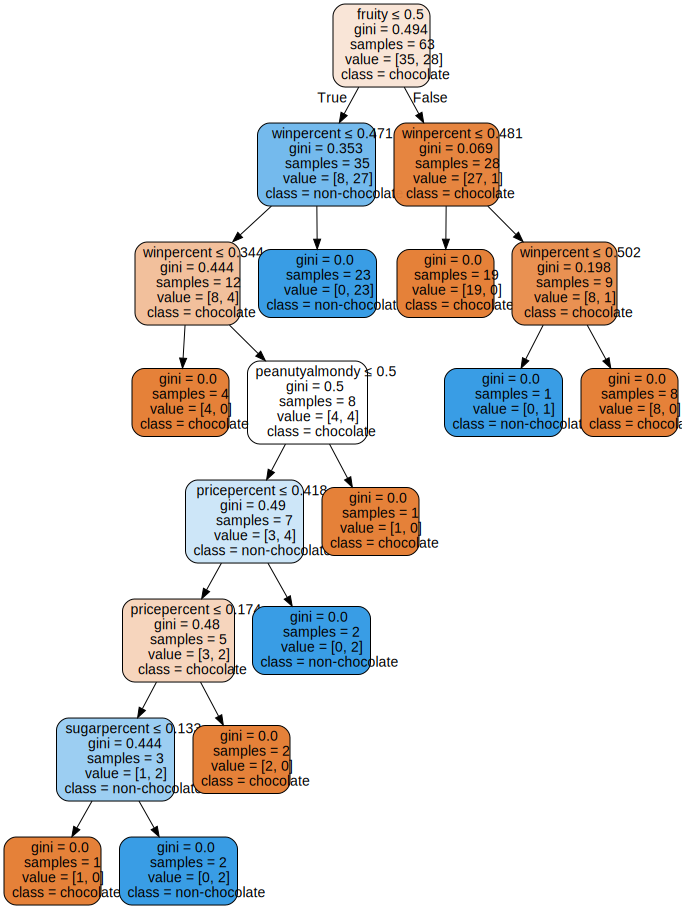

In [14]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=labels_dropped_df.columns.values,  
                         class_names=['chocolate', 'non-chocolate'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Summary

In this lab, we worked through every stage of the OSEMN process to build and interpret a classifier to determine whether or not a candy was chocolate.  Most of our effort was spent on the **_Explore_**, **_Model_**, and **_iNterpret_** stages.  

* During the **_Explore_** stage, we used Exploratory Data Analysis and visualization to help us gain insight about what features might be most useful to help us answer our question.   
<br>  
* During the **_Model_** stage, we learned about:
    * _Confusion Matrices_ and how to calculate _accuracy_ for binary classification.
    * _Entropy_ and _Information Gain_, and how Decision Trees decide what to split on. 
    * How to build and fit Decision Tree Classifiers using sklearn
    * `train_test_split()` and _cross-validation_, and how they help us make sure our model isn't _overfitting_ our training data.    
<br>    
* Finally, during the **_iNterpret_** stage, we learned how to visualize our Decision Tree, to make the model human-readable.  
